
# Default Probability Estimation Using the Black-Scholes-Merton Model

## Task Statement
A company, **Covenant CO**, has the following financial characteristics:

- **Market equity value at time** = 1.2 billion USD
- **Total debt (face value) at maturity** = 1.5 billion USD
- **Stock price volatility**  = 0.35 (annualized)
- **Risk-free rate** = 3\% (0.03 in decimal form)
- **Forecast horizon** = 1  year
- **Initial guess for asset volatility**  = 0.25 

## Objectives
1. **Estimate the firm’s asset value** iteratively using the Black-Scholes-Merton equation.
2. **Compute asset volatility**  using stock price movements.
3. **Determine the distance to default (DD)** using the formula:

4. **Calculate the default probability (PD)**:
## Plots
- Default probability vs. asset volatility.
- Default probability vs. time-to-maturity.



Just parameters and simple accounting equation :)

In [16]:
# importing all needed libraries
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Setting parameters

MV = 1_200_000
Debt = 1_500_000
Sigma = 0.35
evol = 0.25
R = 0.03
T = 1
t = 0

#Compute Total Asset Value

TA = MV+Debt
tau = T-t

print('Total Asset Value equals to',TA)

Total Asset Value equals to 2700000


The Black-Scholes-Merton (BSM) model is used in Merton’s Structural Credit Risk Model to estimate the value of a firm’s equity and debt. This is because equity in a leveraged firm behaves like a call option on the firm’s assets. The Merton model treats a company's capital structure as a financial option, allowing us to price credit risk.

In [17]:
#Black Scholes Call formula

def black_scholes(TA,Debt,Sigma,R,tau,T):
    d1 = (math.log(TA/Debt) + (R+(Sigma**2)/2)*tau) / (Sigma*math.sqrt(tau))
    d2 = d1 - Sigma * math.sqrt(tau)
    return norm.cdf(d1) * TA -  norm.cdf(d2)*Debt*math.exp(-R*tau)                 
price = black_scholes(TA,Debt,Sigma,R,tau ,T)
print('Call option according to the BSM model',price)


Call option according to the BSM model 1255016.3089370506


Estimated volatility is a model-derived value based on current market conditions or mathematical assumptions.It is often ex-ante (forward-looking) and is used for risk modeling. In structural credit risk models like Merton’s model, volatility is not directly observable and must be inferred from market data.

In [23]:
#Computing asset volatility

mvol = evol * (MV/TA) 

print('Estimated volatility for Merton Model equals', mvol)

Estimated volatility for Merton Model equals 0.1111111111111111


Distance to Default (DD) is a measure used in Merton’s structural model and the KMV-Merton model to assess a firm's credit risk. It quantifies how many standard deviations the firm's asset value is away from the default threshold (debt value) at a given time horizon.

Mathematically, it represents the number of standard deviations the firm's asset value can drop before hitting default. A higher DD means lower credit risk, while a lower DD means the firm is closer to default.

In [25]:
#Determining the distance of default

DD = (TA - Debt) / (mvol*TA)

print('The distance to default equals' , DD )

The distance to default equals 4.0


In [40]:
# Compute Default Probability (PD)

def pd(MV,TA,Debt,R,mvol,tau):
    d1 = -(math.log(TA/Debt) + (R-(mvol**2)/2)*tau) / (mvol*math.sqrt(tau))
    return norm.cdf(d1)
PD = pd(MV,TA,Debt,R,mvol,tau)
 

print("The probability of default of Covenant CO equals", PD)

The probability of default of Covenant CO equals 1.8508306722087065e-08


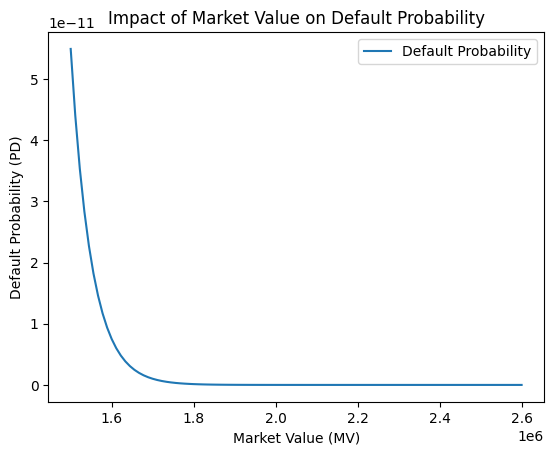

In [45]:
# Calculating PD based in different Market values
    
x = np.linspace(0+Debt,1_200_000+Debt , 100)

# Initialize empty lists to store values
PD_values = []

# Loop over each value of r in the array x
for MV in x:
    TA = MV + Debt  # Compute total asset value based on new MV
    PD_values.append(pd(MV,TA,Debt,R,mvol,tau))  

# Display values on graph
plt.plot(x, PD_values, label="Default Probability")
plt.xlabel("Market Value (MV)")
plt.ylabel("Default Probability (PD)")
plt.title("Impact of Market Value on Default Probability")
